In [1]:
# install pipenv requirements
!pipenv install
import dotenv
import os

# load environment variables
dotenv.load_dotenv()
SSH_USERNAME = os.getenv("SSH_USERNAME")
SSH_HOST = os.getenv("SSH_HOST")
SSH_PORT = os.getenv("SSH_PORT")
SSH_PASSWORD = os.getenv("SSH_PASSWORD")
NS3DIR = os.getenv("NS3DIR")

Loading .env environment variables...
Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.
Installing dependencies from Pipfile.lock (d17b6c)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


In [2]:
from wifi_experiment.utlis import *

# connect to remote host
host = remote_host(host=SSH_HOST, port=SSH_PORT, username=SSH_USERNAME, password=SSH_PASSWORD, ns3dir=NS3DIR, timeout=hours_to_seconds(2)) # this might usually be a bad idea, but the simulation runs a long time, so the timeout is set to a ridiculous value

In [3]:
# setup example experiment
propModel = propagationModels[0]
run = experiment_run(host=host, propModel=propModel, simulationTime_s=20*60 distance_m=10, remote_csv_path=f"{host.ns3dir}/output/twentyMinutes", local_csv_path="output/twentyMinutes", export_rx_dr=True, export_summary=True, export_rx_pwr=True, remote_file_cleanup=False)
run.run()

/home/mfaatz2s/ns-allinone-3.39/ns-3.39/ns3 run scratch/wifi-experiment.cc -- --distance=10 --simulationTime=7200 --csv_export_path=/home/mfaatz2s/ns-allinone-3.39/ns-3.39/oneHour --export_rx_dr=true --export_rx_pwr=true --export_summary=true --propagationModel=FriisPropagationLossModel


Exception: Command /home/mfaatz2s/ns-allinone-3.39/ns-3.39/ns3 run scratch/wifi-experiment.cc -- --distance=10 --simulationTime=7200 --csv_export_path=/home/mfaatz2s/ns-allinone-3.39/ns-3.39/oneHour --export_rx_dr=true --export_rx_pwr=true --export_summary=true --propagationModel=FriisPropagationLossModel failed with exit status -1

In [10]:
import pandas as pd
dr_df = pd.read_csv(run.local_rx_dr_csv_path)
dr_df.describe()

,Time,DataRate_Mbps
count,17514.000000,17514.000000
mean,5.571964,78.525939
std,2.560615,5.583808
min,1.009540,5.679530
25%,3.355985,74.830000
50%,5.577440,78.250700
75%,7.793013,82.003000
max,9.999370,124.515000


In [6]:

pwr_df = pd.read_csv(run.local_rx_pwr_csv_path)
pwr_df.describe()


,Time,RxPower
count,17519.000000,17519.000000
mean,5.570820,-54.712686
std,2.561410,0.000410
min,1.008010,-54.712700
25%,3.354425,-54.712700
50%,5.576320,-54.712700
75%,7.792465,-54.712700
max,9.999600,-54.698800


In [9]:
summary_df = pd.read_csv(run.local_summary_csv_path)

summary_df.head()

,FlowId,SourceAddress,DestinationAddress,ReceivedDataRate,AverageRxPower
0,1,10.1.1.1,10.1.1.2,68.74,-54.71


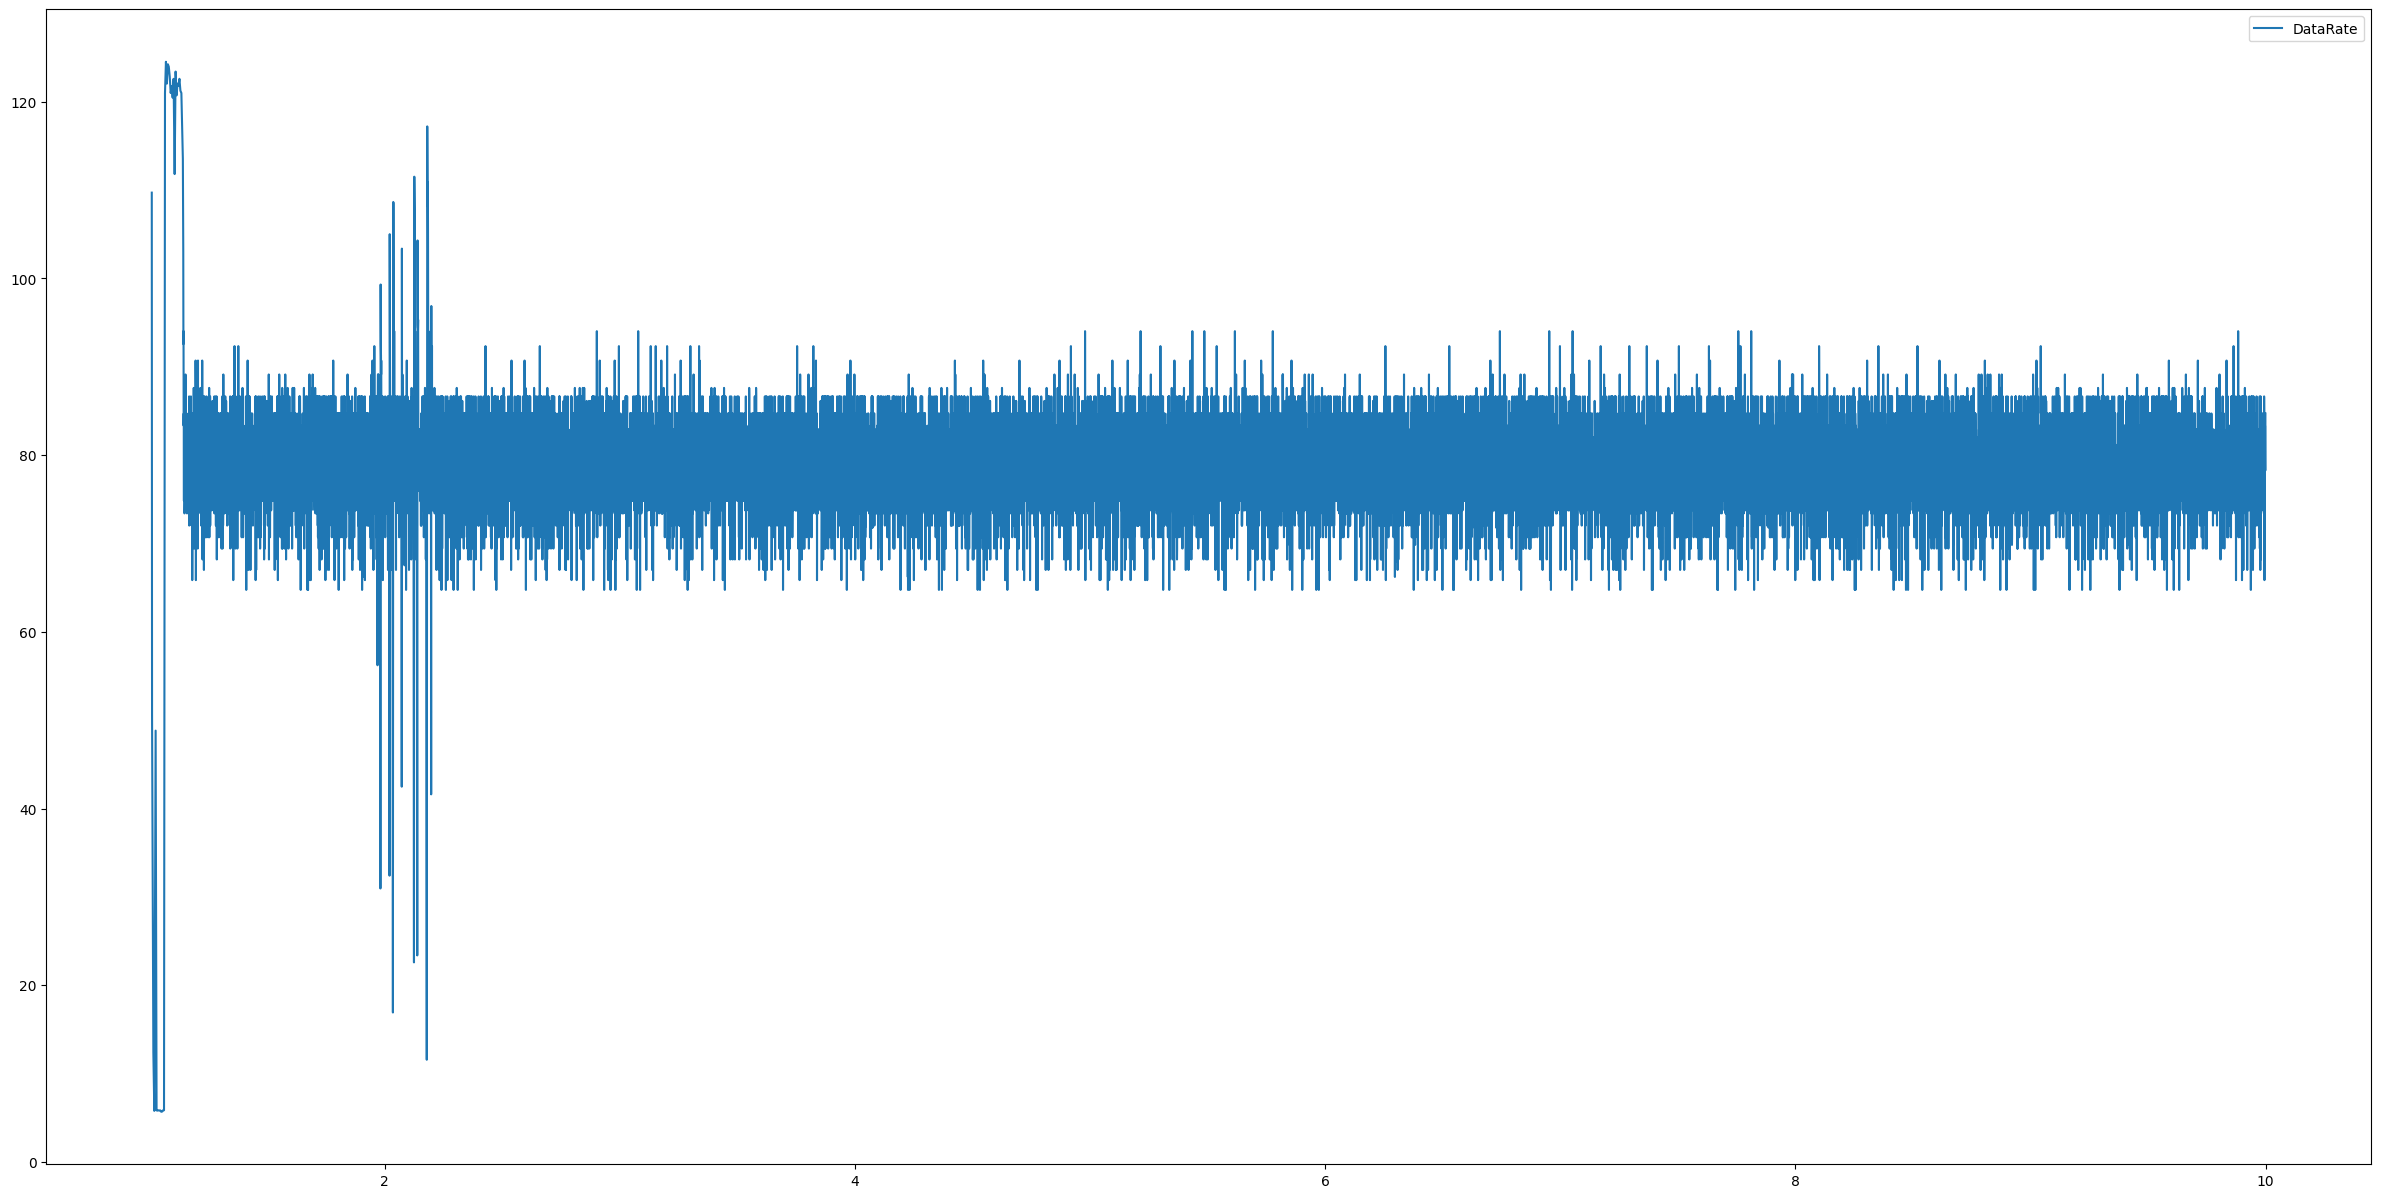

In [22]:
# plot datarate against time
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15))  # Set the width to 30 centimeters and height to 15 centimeters
plt.plot(dr_df["Time"], dr_df["DataRate_Mbps"], label="DataRate")
plt.legend()
plt.show()
